## Review

In [59]:
#####SECRET CODE#####
"""
In this block I am activating a new function to print out dictionaries 
in a pretty fashion - it's not part of the lesson
"""
import json

def dprint(d):
    print(json.dumps(d,
                     sort_keys=True,
                     indent=4))


In [60]:
## Review
"""
what does the following code output?
"""

def magic(x,y=False):
    if y:
        return x
    else:
        return -x

        
magic_list = [magic(i, i%2==0) for i in range(10) if i>2 and i<8]
print(magic_list)


[-3, 4, -5, 6, -7]


## Pandas - Python Data Analysis Library

In [61]:
## Recall our example of File I/O

# this is what our file looks like... 
"""
measurement_number,temperature,sample_site
1,20.9,1
2,23.1,3
3,32.2,2
"""

# Here we read a file
file_info = []
with open("inputs/example_file_1.txt") as f:
    header = f.readline()
    columns = header.rstrip().split(",")
    for line in f:
        split_line = line.rstrip().split(",")
        row_dict = {columns[i]: float(col) for i, col in enumerate(split_line)} 
        file_info.append(row_dict)

dprint(file_info)



[
    {
        "measurement_number": 1.0,
        "sample_site": 1.0,
        "temperature": 20.9
    },
    {
        "measurement_number": 2.0,
        "sample_site": 3.0,
        "temperature": 23.1
    },
    {
        "measurement_number": 3.0,
        "sample_site": 2.0,
        "temperature": 32.2
    }
]


In [62]:
# now let's do something useful w/ this data

temperatures = [list_item["temperature"] for list_item in file_info]
max_temp = max(temperatures)
min_temp = min(temperatures)

sum_temps = 0
for temp in temperatures:
    sum_temps+=temp
mean_temp = sum_temps / len(temperatures)

print("the maximum temperature is {temp}".format(temp=max_temp))    
print("the minimum temperature is {temp}".format(temp=min_temp))    
print("the average temperature is {temp}".format(temp=mean_temp))    



the maximum temperature is 32.2
the minimum temperature is 20.9
the average temperature is 25.400000000000002


In [63]:
## Pandas

"""
The tasks we performed here are extremely common

ie: 1) reading in a delimited tabular data file
    2) perform some operations on the columns of that data

This is so common that an entire package called Pandas
has been developed to make this easier and more useful

Pandas is excedingly popular and it very powerful allowing
the user to perform all kinds of cool operations on data 
like summaries, mutation, reshaping, joining, etc.

more here:
https://pandas.pydata.org/docs/

"""

#people often shorthand the pandas library to pd
import pandas as pd


## pandas dataframes
![numpy](resources/01_table_dataframe.svg)


In [64]:
## reading in a csv file

"""
to read a csv file into a pandas dataframe we can use the
read_csv function
"""
import pandas as pd
df = pd.read_csv("inputs/example_file_1.txt", sep=",")
df

,measurement_number,temperature,sample_site
0,1,20.9,1
1,2,23.1,3
2,3,32.2,2


## input file -> dataframe -> output file

reading different kinds of files into pandas dataframes is straightforward

![numpy](resources/02_io_readwrite.svg)



In [65]:
## accessing a single column

df["temperature"]

0    20.9
1    23.1
2    32.2
Name: temperature, dtype: float64

In [66]:
## accessing a set of columns

df[["temperature","sample_site"]]

,temperature,sample_site
0,20.9,1
1,23.1,3
2,32.2,2


In [67]:
## summarizing the data from a column 

"""
Basic statistics (mean, median, min, max, counts…) are easily calculable from
a column or a set of columns

you can find them here: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
"""

print(df[["temperature"]].mean())
print(df[["temperature"]].max())
print(df[["temperature","sample_site"]].mean())

temperature    25.4
dtype: float64
temperature    32.2
dtype: float64
temperature    25.4
sample_site     2.0
dtype: float64


In [68]:
## describing tables

"""
pandas has built in functions to summarize the entire table
"""
df.describe()

,measurement_number,temperature,sample_site
count,3.0,3.000000,3.0
mean,2.0,25.400000,2.0
std,1.0,5.990826,1.0
min,1.0,20.900000,1.0
25%,1.5,22.000000,1.5
50%,2.0,23.100000,2.0
75%,2.5,27.650000,2.5
max,3.0,32.200000,3.0


In [69]:
df

,measurement_number,temperature,sample_site
0,1,20.9,1
1,2,23.1,3
2,3,32.2,2


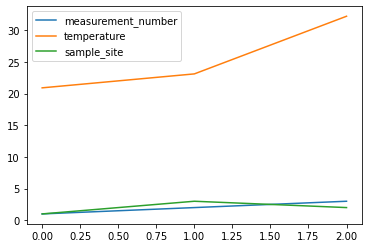

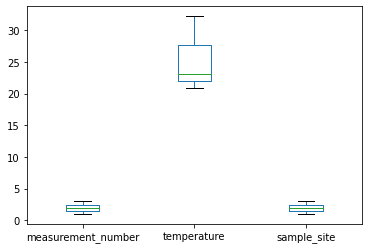

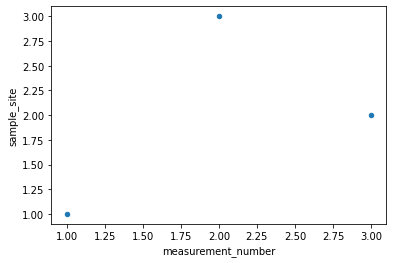

In [70]:
## simple plotting 

"""
https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html#min-tut-04-plotting

** DANGER ** pandas plotting kinda sucks... it's more for exploration 
** R is far more developed for most plotting purposes **

"""
df.plot()
df.plot.box()
df.plot.scatter(x="measurement_number",y="sample_site")

In [71]:
## more complex data

"""
here is some simple data about temperatures collected over 2 years
across of 5 cities
"""

weather_df = pd.read_csv("inputs/weather.csv",sep="\t")
weather_df

,city,date,avg_temp,high_temp,low_temp
0,Auckland,2016-01-01,65,68,62
1,Auckland,2016-01-02,66,68,64
2,Auckland,2016-01-03,72,77,66
3,Auckland,2016-01-04,66,73,60
4,Auckland,2016-01-05,62,69,55
...,...,...,...,...,...
3650,San Diego,2017-12-27,60,69,50
3651,San Diego,2017-12-28,62,74,49
3652,San Diego,2017-12-29,63,77,49
3653,San Diego,2017-12-30,61,72,49


In [72]:
## how big is this table?
weather_df.shape

(3655, 5)

In [73]:
## which cities are there?
#weather_df["city"].describe()
weather_df["city"].unique()

array(['Auckland', 'Mumbai', 'Beijing', 'Chicago', 'San Diego'],
      dtype=object)

In [74]:
## subsetting based on logic

weather_df[weather_df["city"]=="Auckland"]

,city,date,avg_temp,high_temp,low_temp
0,Auckland,2016-01-01,65,68,62
1,Auckland,2016-01-02,66,68,64
2,Auckland,2016-01-03,72,77,66
3,Auckland,2016-01-04,66,73,60
4,Auckland,2016-01-05,62,69,55
...,...,...,...,...,...
726,Auckland,2017-12-27,68,73,62
727,Auckland,2017-12-28,62,68,55
728,Auckland,2017-12-29,65,73,57
729,Auckland,2017-12-30,66,75,57


In [75]:
## subsetting based on logic

weather_df[weather_df["avg_temp"]<10]

,city,date,avg_temp,high_temp,low_temp
1484,Beijing,2016-01-23,4,8,1
2209,Chicago,2016-01-17,4,8,-1
2210,Chicago,2016-01-18,2,7,-4
2211,Chicago,2016-01-19,9,17,0
2542,Chicago,2016-12-15,4,9,-2
2545,Chicago,2016-12-18,6,18,-7
2546,Chicago,2016-12-19,1,15,-13
2563,Chicago,2017-01-05,8,13,3
2564,Chicago,2017-01-06,5,9,0
2565,Chicago,2017-01-07,9,18,0


In [76]:
## subsetting based on specific location in the table

"""
we can use the iloc function to get a specific row, or a specific set of rows
"""

weather_df.iloc[1484:1488]

,city,date,avg_temp,high_temp,low_temp
1484,Beijing,2016-01-23,4,8,1
1485,Beijing,2016-01-24,15,25,5
1486,Beijing,2016-01-25,22,35,10
1487,Beijing,2016-01-26,28,35,21


## adding new columns to tables
![numpy](resources/05_newcolumn_2.svg)

In [77]:
## adding new columns
weather_df["daily_delta"] = weather_df["high_temp"]-weather_df["low_temp"]
weather_df

,city,date,avg_temp,high_temp,low_temp,daily_delta
0,Auckland,2016-01-01,65,68,62,6
1,Auckland,2016-01-02,66,68,64,4
2,Auckland,2016-01-03,72,77,66,11
3,Auckland,2016-01-04,66,73,60,13
4,Auckland,2016-01-05,62,69,55,14
...,...,...,...,...,...,...
3650,San Diego,2017-12-27,60,69,50,19
3651,San Diego,2017-12-28,62,74,49,25
3652,San Diego,2017-12-29,63,77,49,28
3653,San Diego,2017-12-30,61,72,49,23


In [78]:
## groupby

"""
the groupby function allows us to first group by a variable, 
and then apploy a function for each group independently

"""
weather_df.groupby("city").count()


,date,avg_temp,high_temp,low_temp,daily_delta
city,,,,,
Auckland,731,731,731,731,731
Beijing,731,731,731,731,731
Chicago,731,731,731,731,731
Mumbai,731,731,731,731,731
San Diego,731,731,731,731,731


In [80]:
## groupby

#weather_df.groupby("city")["avg_temp"].mean()
#weather_df.groupby("city")['avg_temp'].count()
#weather_df.groupby("city")['avg_temp'].mean()
weather_df.groupby("city").describe()

avg_temp                                                      \
             count       mean        std   min   25%   50%   75%   max   
city                                                                     
Auckland     731.0  60.616963   6.559397  43.0  56.0  60.0  66.0  74.0   
Beijing      731.0  55.488372  20.332060   4.0  35.5  58.0  74.0  88.0   
Chicago      731.0  52.683995  19.475169   1.0  38.0  54.0  70.0  84.0   
Mumbai       731.0  80.937073   4.168556  68.0  78.0  82.0  84.0  90.0   
San Diego    731.0  66.551300   5.979511  52.0  63.0  66.0  71.0  86.0   

          high_temp             ... low_temp       daily_delta             \
              count       mean  ...      75%   max       count       mean   
city                            ...                                         
Auckland      731.0  66.456908  ...     60.0  69.0       731.0  11.744186   
Beijing       731.0  66.570451  ...     64.0  80.0       731.0  22.265390   
Chicago       731.0  61.008208  ...     60.0  75.0       731.0  17.157319   
Mumbai        731.0  89.964432  ...     77.0  84.0       731.0  18.053352   
San Diego     731.0  72.621067  ...     65.0  80.0       731.0  12.641587   

                                                  
                std  min   25%   50%   75%   max  
city                                              
Auckland   4.081224  2.0   9.0  11.0  14.0  24.0  
Beijing    7.830264  3.0  16.0  22.0  27.0  47.0  
Chicago    6.981866  3.0  12.0  17.0  22.0  45.0  
Mumbai     7.899967  3.0  11.0  16.0  24.5  37.0  
San Diego  6.401637  2.0   8.0  11.0  16.0  33.0  

[5 rows x 32 columns]

In [81]:
## plot time series data by city
"""
currently the date is a "string" we know this because pandas is 
saying that it's an "object" - if we want to plot this data we want
to interpret these dates as being times that have can be ordered one
after another


"""
weather_df["date"]


0       2016-01-01
1       2016-01-02
2       2016-01-03
3       2016-01-04
4       2016-01-05
           ...    
3650    2017-12-27
3651    2017-12-28
3652    2017-12-29
3653    2017-12-30
3654    2017-12-31
Name: date, Length: 3655, dtype: object

In [82]:
## converting our dates to a "datetime" type
"""
we can convert the date column to a "datetime" type
this type is similar to integer or a float, but,
it's specific for times and dates

"""

weather_df['date'] = pd.to_datetime(weather_df["date"])
weather_df["date"]


0      2016-01-01
1      2016-01-02
2      2016-01-03
3      2016-01-04
4      2016-01-05
          ...    
3650   2017-12-27
3651   2017-12-28
3652   2017-12-29
3653   2017-12-30
3654   2017-12-31
Name: date, Length: 3655, dtype: datetime64[ns]

city
Auckland     AxesSubplot(0.125,0.125;0.775x0.755)
Beijing      AxesSubplot(0.125,0.125;0.775x0.755)
Chicago      AxesSubplot(0.125,0.125;0.775x0.755)
Mumbai       AxesSubplot(0.125,0.125;0.775x0.755)
San Diego    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

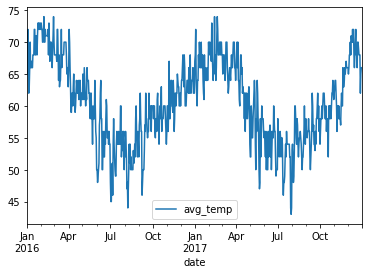

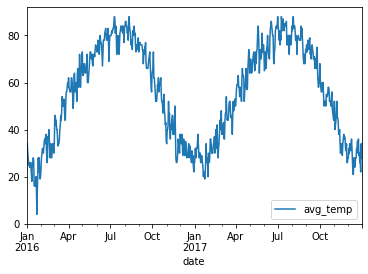

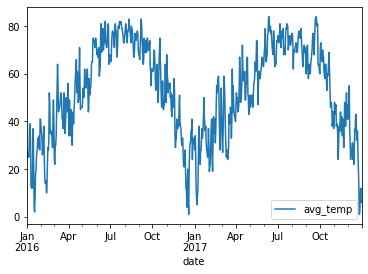

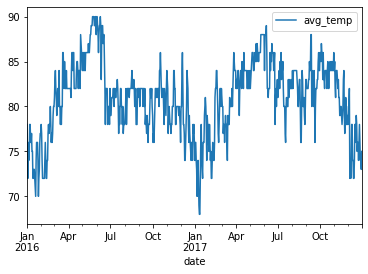

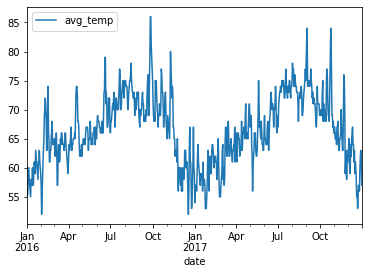

In [83]:
## plot time series data by city

weather_df.groupby("city").plot.line(x="date", y="avg_temp")
#weather_df.groupby("city").plot.line(x="date", y="daily_delta")


In [84]:
## outputting a table


"""
once we do somethign w/ our table, we often want to output it
there are loads of "to_xxx" functions that allow us to do this

e.g. to_csv is one of the most useful!

"""

df_SD_only = weather_df[weather_df["city"]=="San Diego"]
df_SD_only.to_csv("inputs/weather_SD_only.csv",sep="\t")


In [85]:
## creating a table from dictionary

"""
Another thing we often want to do is create a dataframe 
"on the fly" in code. There are many ways to do this, but
one of the most useful is to create a list of dictionaries, 
where each dictionary is keyed off of the desired column names


"""

city_coords = [{"city":"Auckland","lat":-36.848461, "lon": 174.763336},
               {"city":"Beijing", "lat": 39.916668,"lon": 116.383331},
               {"city":"Chicago", "lat": 41.881832,"lon": -87.623177},
               {"city":"Mumbai", "lat":19.076090 ,"lon": 72.877426},
               {"city":"San Diego","lat":32.715736,"lon": -117.161087}]

dprint(city_coords)

[
    {
        "city": "Auckland",
        "lat": -36.848461,
        "lon": 174.763336
    },
    {
        "city": "Beijing",
        "lat": 39.916668,
        "lon": 116.383331
    },
    {
        "city": "Chicago",
        "lat": 41.881832,
        "lon": -87.623177
    },
    {
        "city": "Mumbai",
        "lat": 19.07609,
        "lon": 72.877426
    },
    {
        "city": "San Diego",
        "lat": 32.715736,
        "lon": -117.161087
    }
]


In [86]:
## creating a table from dictionary

df_coords = pd.DataFrame(city_coords)
df_coords

,city,lat,lon
0,Auckland,-36.848461,174.763336
1,Beijing,39.916668,116.383331
2,Chicago,41.881832,-87.623177
3,Mumbai,19.076090,72.877426
4,San Diego,32.715736,-117.161087


In [87]:
## Another example of creating a dataframe on the fly


dict_list = []

for x in range(100):
    x_sq = x**2
    x_sqrt = x**(1/2)
    dict_list.append({"x":x, "x squared":x_sq, "x squarerooted":x_sqrt})

t=pd.DataFrame(dict_list)
#t.to_csv(fn_output)
t


,x,x squared,x squarerooted
0,0,0,0.000000
1,1,1,1.000000
2,2,4,1.414214
3,3,9,1.732051
4,4,16,2.000000
...,...,...,...
95,95,9025,9.746794
96,96,9216,9.797959
97,97,9409,9.848858
98,98,9604,9.899495


## merging data between tables

often we have data in multiple tables that we wish to combine
![numpy](resources/08_concat_row.svg)



In [90]:
## subsetting our table into two tables
df1 = df_coords.iloc[:3]
df2 = df_coords.iloc[3:]
df1
df2

,city,lat,lon
3,Mumbai,19.076090,72.877426
4,San Diego,32.715736,-117.161087


In [101]:
## concatenating tables

concatenated_table = pd.concat([df2,df1])
concatenated_table


,city,lat,lon
3,Mumbai,19.076090,72.877426
4,San Diego,32.715736,-117.161087
0,Auckland,-36.848461,174.763336
1,Beijing,39.916668,116.383331
2,Chicago,41.881832,-87.623177


In [102]:
concatenated_table.iloc[1]

city    San Diego
lat       32.7157
lon      -117.161
Name: 4, dtype: object

In [103]:
concatenated_table.loc[1]

city    Beijing
lat     39.9167
lon     116.383
Name: 1, dtype: object

In [94]:
weather_df

,city,date,avg_temp,high_temp,low_temp,daily_delta
0,Auckland,2016-01-01,65,68,62,6
1,Auckland,2016-01-02,66,68,64,4
2,Auckland,2016-01-03,72,77,66,11
3,Auckland,2016-01-04,66,73,60,13
4,Auckland,2016-01-05,62,69,55,14
...,...,...,...,...,...,...
3650,San Diego,2017-12-27,60,69,50,19
3651,San Diego,2017-12-28,62,74,49,25
3652,San Diego,2017-12-29,63,77,49,28
3653,San Diego,2017-12-30,61,72,49,23


In [95]:
df_coords

,city,lat,lon
0,Auckland,-36.848461,174.763336
1,Beijing,39.916668,116.383331
2,Chicago,41.881832,-87.623177
3,Mumbai,19.076090,72.877426
4,San Diego,32.715736,-117.161087


In [96]:
## merging tables

merged_table = pd.merge(weather_df, df_coords, on="city")
merged_table

,city,date,avg_temp,high_temp,low_temp,daily_delta,lat,lon
0,Auckland,2016-01-01,65,68,62,6,-36.848461,174.763336
1,Auckland,2016-01-02,66,68,64,4,-36.848461,174.763336
2,Auckland,2016-01-03,72,77,66,11,-36.848461,174.763336
3,Auckland,2016-01-04,66,73,60,13,-36.848461,174.763336
4,Auckland,2016-01-05,62,69,55,14,-36.848461,174.763336
...,...,...,...,...,...,...,...,...
3650,San Diego,2017-12-27,60,69,50,19,32.715736,-117.161087
3651,San Diego,2017-12-28,62,74,49,25,32.715736,-117.161087
3652,San Diego,2017-12-29,63,77,49,28,32.715736,-117.161087
3653,San Diego,2017-12-30,61,72,49,23,32.715736,-117.161087


# numpy

In [105]:
## numpy

"""

In addition to having lots of useful functionality, pandas is FAST.
The reason pandas is so fast is that it is s built on top of 
another package called numpy (numerical python) which provides 
an interface to numeric vector / matrix analysis

numpy is the fundamental package of scientific computing in python and
alongside the scipy (scientific python) is extremely powerful

"""

## columns of data in pandas are stored as numpy "ndarrays"


weather_df["avg_temp"].values #EXTRACT THE DATA FROM a PANDAS TABLE
#type(weather_df["avg_temp"].values)



numpy.ndarray

In [ ]:
## numpy ndarrays

"""
numpy ndarrays are n-dimensional homogeneous arrays 

homogenoous meaning only one type of data can be stored 
in any individual array (e.g. a float or an integer)

n-dimensional meaning they can have any dimension, 

e.g.
"""

![numpy](resources/numpy_arrays.png)

In [106]:
## creating numpy arrays

#import numpy
import numpy as np

#create a new numpy array from a list
x = [1,3,5,1,3,3,3]
y = np.array(x)

# the list and the array look similar when we print them
print(x) 
print(y)

# but the objects are different underneath
print(type(x))
print(type(y)) 


[1, 3, 5, 1, 3, 3, 3]
[1 3 5 1 3 3 3]
<class 'list'>
<class 'numpy.ndarray'>


In [107]:
## creating numpy arrays cont...

# creating a 2d array from a list of lists
#a 2d array is a matrix!

x = np.array([[1,2,4],[19,3,1],[9,13,100]])
print(x)


[[  1   2   4]
 [ 19   3   1]
 [  9  13 100]]


In [108]:
## accessing array elements

"""
we can use an extension of standard python list 
indexing to access individual elements or subsets
of the matrix
"""

print(x[1,1])
print(x[0,:])
print(x[:,0])

3
[1 2 4]
[ 1 19  9]


![](resources/array_indexing.jpg)

In [109]:
## other ways to create arrays

print("ones", np.ones(5))
print("arange", np.arange(5))
print("linspace", np.linspace(0., 1., 5))
print("random", np.random.uniform(size=3))
print("list based", np.array([2, 3, 5]))

ones [1. 1. 1. 1. 1.]
arange [0 1 2 3 4]
linspace [0.   0.25 0.5  0.75 1.  ]
random [0.28 0.95 0.72]
list based [2 3 5]


In [110]:
## reshaping arrays

print(np.arange(4).reshape([2,2]))

[[0 1]
 [2 3]]


In [111]:
## inspecting numpy arrays

"""
looking at the shape of arrays
"""

x=np.ones(5)
y=np.zeros([5,5])

print(x)
print(y)

print(x.shape)
print(y.shape)



[1. 1. 1. 1. 1.]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
(5,)
(5, 5)


In [112]:
## simple ndarray manipulations

##*** THIS CODE IS JUST TO MAKE THE OUT EASIER TO READ **
np.set_printoptions(precision=2,suppress=False)
##***

y = np.arange(1,10)

print("y:",y)
print("1/y:",1/y)
print("5*y:", 5*y)
print("log(y):", np.log(y))


y: [1 2 3 4 5 6 7 8 9]
1/y: [1.   0.5  0.33 0.25 0.2  0.17 0.14 0.12 0.11]
5*y: [ 5 10 15 20 25 30 35 40 45]
log(y): [0.   0.69 1.1  1.39 1.61 1.79 1.95 2.08 2.2 ]


In [115]:
## element wise operations and 

"""
ndarrays of the same size can be added, subtracted, etc
in an element wise fashion

"""

x = np.arange(10)
y = np.random.uniform(size=10)

print("x:",x)
print("y:",y)

print("y+x:", y+x)
print("y*x:", y*x)
print("x**x:", x**y)
#np.r_[x,y]

x: [0 1 2 3 4 5 6 7 8 9]
y: [0.28 0.22 1.   0.58 0.34 0.59 0.34 0.74 0.29 0.58]
y+x: [0.28 1.22 3.   3.58 4.34 5.59 6.34 7.74 8.29 9.58]
y*x: [0.   0.22 2.   1.75 1.35 2.96 2.06 5.18 2.32 5.24]
x**x: [0.   1.   2.   1.9  1.6  2.6  1.85 4.22 1.83 3.59]


array([0.  , 1.  , 2.  , 3.  , 4.  , 5.  , 6.  , 7.  , 8.  , 9.  , 0.28,
       0.22, 1.  , 0.58, 0.34, 0.59, 0.34, 0.74, 0.29, 0.58])

In [116]:
## matrix math

#reshape 
x = np.arange(4).reshape([2,2])

print(x)

print("element wise multiplication")
print(x*x)

print("matrix multiplication")
print(np.matmul(x,x))

[[0 1]
 [2 3]]
element wise multiplication
[[0 1]
 [4 9]]
matrix multiplication
[[ 2  3]
 [ 6 11]]


## aggregation functions

| Function Name | NaN-safe Version | Description                               |
|---------------|------------------|-------------------------------------------|
| np.sum        | np.nansum        | Compute sum of elements                   |
| np.prod       | np.nanprod       | Compute product of elements               |
| np.mean       | np.nanmean       | Compute mean of elements                  |
| np.std        | np.nanstd        | Compute standard deviation                |
| np.var        | np.nanvar        | Compute variance                          |
| np.min        | np.nanmin        | Find minimum value                        |
| np.max        | np.nanmax        | Find maximum value                        |
| np.argmin     | np.nanargmin     | Find index of minimum value               |
| np.argmax     | np.nanargmax     | Find index of maximum value               |
| np.median     | np.nanmedian     | Compute median of elements                |
| np.percentile | np.nanpercentile | Compute rank-based statistics of elements |
| np.any        | N/A              | Evaluate whether any elements are true    |
| np.all        | N/A              | Evaluate whether all elements are true    |

In [117]:
## aggregation functions on ndarrays

x = np.arange(100)

print("mean:", np.mean(x))
print("sum:", np.sum(x))

mean: 49.5
sum: 4950


In [118]:
## boolean indexing
"""
we can subset arrays using boolean logic which is extremely useful

"""


x = np.arange(10)

x_lt_4 = x<4

print(x)
print(x_lt_4)
print(x[x_lt_4])
print(x[x<4])

print(x[(x<4)|(x>7)])


[0 1 2 3 4 5 6 7 8 9]
[ True  True  True  True False False False False False False]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3 8 9]


In [119]:
## numpy is FAST!

"""
operations on numpy arrays are SUPER fast
for example, let's compare summing 10000 random numbers 
using numpy or a simple python list
"""

big_array = np.random.rand(10000)
big_list = list(big_array)

%timeit sum(big_list) # sum is the built in pythonsum function
%timeit np.sum(big_array)

853 µs ± 74.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
7.85 µs ± 394 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


(array([  1.,   5.,  13.,  21.,  78., 100., 167., 181., 181., 146.,  64.,
         24.,  17.,   2.,   0.]),
 array([-0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5,
        10.5, 11.5, 12.5, 13.5, 14.5]),
 <a list of 15 Patch objects>)

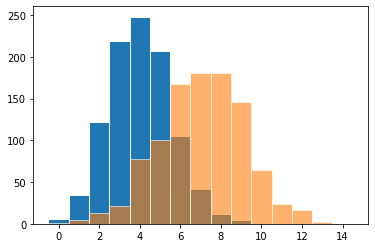

In [120]:
## So much more!
"""

we are just scratching the surface of what 
numpy can do!


for example: let's take a a look at some of the 
capability of the random module of numpy

https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html
https://docs.scipy.org/doc/scipy/reference/

"""
import matplotlib.pyplot as plt

#draw n samples from a binomial distribution with probability p
# np.random.binomial(n ,p , k draws)

binomial_draws = np.random.binomial(10, 0.4, 1000)
normal_draws = np.random.normal(7, 2, 1000)

#plotting code
unit_bins = np.arange(0 - 0.5, 15 + 0.5)
plt.hist(binomial_draws, bins=unit_bins, ec="white")
plt.hist(normal_draws, bins=unit_bins, ec="white",alpha=.6)


In [ ]:
## CHEAT SHEETS AND SUPER ADVANCED

